### Computational Representation of Cellular Lines using BERT embeddings

1. Load dependencies

In [10]:
import pandas as pd
from sentence_transformers import SentenceTransformer

C:\ProgramData\Anaconda3\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


2. Read corpus file

In [9]:
# Read CSV file
df = pd.read_csv('../data/abstracts.csv.gz', index_col=0, header=0).drop(columns=['Unnamed: 0','index'])
df

,cell_line,pubmedid,title,abstract
0,CVCL_0006,35715860,Tumor-associated macrophages promote epithelia...,Triple-negative breast cancer (TNBC) is a high...
1,CVCL_0006,35373342,THP-1 reference data: Proposal of an in vitro ...,THP-1 is a representative leukemia cell line a...
2,CVCL_0006,35745634,Antistaphylococcal Activities and ADME-Related...,"Pattern 1-hydroxy-N-(2,4,5-trichlorophenyl)-2-..."
3,CVCL_0006,36232947,Study of Biological Activities and ADMET-Relat...,A series of eleven benzylated intermediates an...
4,CVCL_0006,36499415,Trifluoromethylcinnamanilide Michael Acceptors...,A series of thirty-two anilides of 3-(trifluor...
...,...,...,...,...
266785,CVCL_ZZ97,33969526,In vivo CRISPR screening for novel noncoding R...,CRISPR (clustered regularly interspaced short ...
266786,CVCL_ZZ97,29577375,Ca2+/calmodulin-dependent protein kinase II an...,Traumatic injury often results in axonal sever...
266787,CVCL_ZZ97,32954502,Noradrenaline protects neurons against H<sub>2...,Oxidative stress has been implicated in a vari...
266788,CVCL_ZZ97,36200530,Development of a novel bioengineered 3D brain-...,Primary blast injury is caused by the direct i...


3. Encode texts into embeddings

In [ ]:
# Load BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(df['abstract'].tolist())

/home/icarrera/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 34: CUDA driver is a stub library (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/home/icarrera/.local/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
df_emb = pd.DataFrame(embeddings)

In [7]:
df_emb['cell_line'] = df['cell_line']
df_emb

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,cell_line
0,0.001646,-0.051518,0.012103,-0.086777,0.023402,-0.047584,-0.006664,0.041555,0.069022,0.029893,...,0.058924,-0.025414,0.007197,0.060109,-0.020048,0.005192,-0.036511,0.095584,0.008293,CVCL_0006
1,-0.090570,-0.006304,-0.050936,-0.139268,0.030370,0.050850,-0.037330,0.074493,0.027430,-0.070027,...,0.085407,-0.061002,-0.041374,0.034096,0.025683,0.011147,-0.024328,-0.007130,-0.099333,CVCL_0006
2,-0.082483,-0.042805,-0.113448,-0.060935,-0.100735,0.079734,-0.035843,0.100713,0.061216,-0.018888,...,0.033852,0.010120,-0.040462,0.033798,-0.013112,-0.049989,-0.069703,0.139773,0.080590,CVCL_0006
3,-0.031977,-0.036589,-0.067277,-0.058774,0.018948,0.081184,-0.040676,0.121510,0.065626,-0.022655,...,0.037363,0.019875,-0.046337,-0.010911,-0.040286,-0.011124,-0.034839,0.113294,0.055154,CVCL_0006
4,-0.028974,-0.140463,-0.102539,-0.056052,-0.002860,0.059033,-0.067480,0.101608,0.027527,-0.007406,...,0.009006,0.011074,-0.003611,-0.015755,0.010004,-0.016519,-0.064637,0.136139,0.065270,CVCL_0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266785,-0.022517,-0.089622,0.000358,-0.033284,0.022799,-0.001587,-0.028890,-0.118856,-0.031084,0.020540,...,0.027875,-0.058793,0.055826,-0.030995,-0.044632,-0.018779,0.047890,0.004235,-0.010341,CVCL_ZZ97
266786,-0.014690,-0.118857,0.009328,0.009496,-0.010099,-0.011672,0.060419,0.081586,0.104964,0.058710,...,0.001986,-0.052756,0.020133,0.058415,-0.038226,0.036905,0.000755,0.027468,-0.056784,CVCL_ZZ97
266787,0.018216,-0.064923,-0.019461,0.073208,0.035298,0.058718,-0.026979,-0.040650,0.003522,-0.020470,...,-0.046701,-0.087746,0.020329,0.051277,-0.177589,0.012030,0.079115,0.011123,0.024096,CVCL_ZZ97
266788,-0.062185,-0.127055,0.011984,-0.031176,-0.014093,-0.011172,0.017468,0.063280,0.023887,0.021855,...,-0.015254,-0.068397,-0.036485,0.089064,-0.062300,0.004278,0.015490,0.073964,-0.005998,CVCL_ZZ97


4. Compute KNN for embeddings

In [8]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Embedding columns are 0 to 383
embedding_columns = list(range(384))  # Select embedding columns
X = df_emb[embedding_columns].values

# Nearest neighbors
k = 5  # The k in k-distance (min_samples value in DBSCAN is often a good choice)
neigh = NearestNeighbors(n_neighbors=k, metric='cosine', n_jobs=-1)  # Use cosine distance as your metric
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort the distances (use the k-th nearest distance for each point)
k_distances = np.sort(distances[:, k-1], axis=0)

6. Plot K-distance for k=5

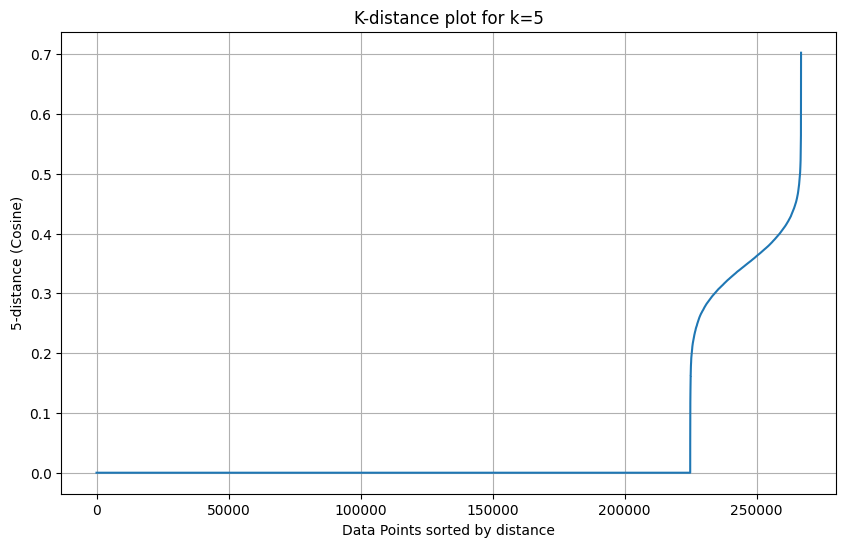

In [9]:
import matplotlib.pyplot as plt

# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.ylabel(f'{k}-distance (Cosine)')
plt.xlabel('Data Points sorted by distance')
plt.title(f'K-distance plot for k={k}')
plt.grid(True)
plt.show()

6. Identify outliers and filter out them

In [10]:
from sklearn.cluster import DBSCAN

# Run DBSCAN with cosine distance
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='cosine')  # Use a lower eps for cosine similarity
df_emb['dbscan_labels'] = dbscan.fit_predict(df_emb[embedding_columns])

# Discard documents labeled as outliers (-1 in DBSCAN labeling)
df_filtered = df_emb[df_emb['dbscan_labels'] != -1].copy()

# Drop the 'dbscan_labels' column if not needed
df_filtered = df_filtered.drop(columns=['dbscan_labels'])

# Now df_filtered contains only the documents that are not considered outliers

In [11]:
df_filtered

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,cell_line
0,0.001646,-0.051518,0.012103,-0.086777,0.023402,-0.047584,-0.006664,0.041555,0.069022,0.029893,...,0.058924,-0.025414,0.007197,0.060109,-0.020048,0.005192,-0.036511,0.095584,0.008293,CVCL_0006
5,-0.126691,-0.098045,-0.024486,-0.021537,0.023993,0.054533,0.052501,0.064183,0.043868,0.051940,...,0.061479,-0.080010,-0.001519,0.088161,-0.067387,-0.038405,-0.029350,-0.017320,-0.028123,CVCL_0006
145,-0.022562,-0.022156,0.012844,-0.049180,0.012630,-0.023039,0.033037,0.126802,0.076441,0.044091,...,-0.001337,0.013891,-0.023121,0.109598,-0.055654,0.042979,0.072155,0.000319,-0.079850,CVCL_0108
147,-0.023665,-0.007957,0.007882,-0.021607,0.018598,0.015486,-0.049603,-0.037496,0.049372,0.023896,...,0.051883,-0.067977,0.041493,0.036123,0.042376,-0.005593,-0.030514,-0.054655,-0.034235,CVCL_0108
453,0.055934,0.016808,-0.048816,0.033691,0.003912,0.081157,-0.007480,0.112597,-0.027021,-0.030749,...,0.054797,0.016996,0.004958,-0.006826,-0.009273,-0.024669,-0.018220,-0.023748,-0.038336,CVCL_0270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266785,-0.022517,-0.089622,0.000358,-0.033284,0.022799,-0.001587,-0.028890,-0.118856,-0.031084,0.020540,...,0.027875,-0.058793,0.055826,-0.030995,-0.044632,-0.018779,0.047890,0.004235,-0.010341,CVCL_ZZ97
266786,-0.014690,-0.118857,0.009328,0.009496,-0.010099,-0.011672,0.060419,0.081586,0.104964,0.058710,...,0.001986,-0.052756,0.020133,0.058415,-0.038226,0.036905,0.000755,0.027468,-0.056784,CVCL_ZZ97
266787,0.018216,-0.064923,-0.019461,0.073208,0.035298,0.058718,-0.026979,-0.040650,0.003522,-0.020470,...,-0.046701,-0.087746,0.020329,0.051277,-0.177589,0.012030,0.079115,0.011123,0.024096,CVCL_ZZ97
266788,-0.062185,-0.127055,0.011984,-0.031176,-0.014093,-0.011172,0.017468,0.063280,0.023887,0.021855,...,-0.015254,-0.068397,-0.036485,0.089064,-0.062300,0.004278,0.015490,0.073964,-0.005998,CVCL_ZZ97


7. Plot K-Distance for all Cell Lines

In [12]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

def k_distance_for_cell_lines(df_emb, k=5):
    """
    Generates a single k-distance plot for all cell_lines.
    
    Parameters:
    - df: A pandas DataFrame containing the documents with a 'cell_line' column.
    - k: The number of neighbors (typically the same as min_samples in DBSCAN).
    """
    embedding_columns = list(range(384))  # Adjust if necessary
    plt.figure(figsize=(10, 6))
    
    # Loop over each cell_line
    for cell_line, group in df_emb.groupby('cell_line'):
        try:
            X = group[embedding_columns].values

            # Nearest neighbors for the cell_line
            neigh = NearestNeighbors(n_neighbors=k, metric='cosine')
            nbrs = neigh.fit(X)
            distances, indices = nbrs.kneighbors(X)

            # Sort the distances (use the k-th nearest distance for each point)
            k_distances = np.sort(distances[:, k-1], axis=0)

            # Plot the k-distance graph for the current cell_line
            plt.plot(k_distances, label=f'Cell line: {cell_line}')
        except:
            print(cell_line)
    
    # Add labels, legend, and grid
    plt.ylabel(f'{k}-distance (Cosine)')
    plt.xlabel('Data Points sorted by distance')
    plt.title(f'K-distance plot for all cell_lines (k={k})')
    plt.legend(loc='best')  # Show legend to identify each cell_line
    plt.grid(True)
    plt.show()

# Call the function
k_distance_for_cell_lines(df_emb, k=5)

CVCL_0024
CVCL_0093
CVCL_0128
CVCL_0147
CVCL_0200
CVCL_0369
CVCL_0404
CVCL_0411
CVCL_0540
CVCL_0562
CVCL_0590
CVCL_0615
CVCL_0843
CVCL_0859
CVCL_0936
CVCL_0C26
CVCL_0C41
CVCL_0C45
CVCL_0I26
CVCL_0M22
CVCL_1018
CVCL_1020
CVCL_1062
CVCL_1064
CVCL_1069
CVCL_1090
CVCL_1140
CVCL_1154
CVCL_1182
CVCL_1191
CVCL_1208
CVCL_1248
CVCL_1294
CVCL_1307
CVCL_1323
CVCL_1388
CVCL_1390
CVCL_1394
CVCL_1396
CVCL_1407
CVCL_1409
CVCL_1437
CVCL_1441
CVCL_1455
CVCL_1482
CVCL_1492
CVCL_1523
CVCL_1529
CVCL_1541
CVCL_1546
CVCL_1552
CVCL_1563
CVCL_1599
CVCL_1606
CVCL_1621
CVCL_1637
CVCL_1643
CVCL_1671
CVCL_1694
CVCL_1713
CVCL_1737
CVCL_1804
CVCL_1807
CVCL_1825
CVCL_1833
CVCL_1835
CVCL_1840
CVCL_1843
CVCL_1869
CVCL_1877
CVCL_1890
CVCL_1898
CVCL_1968
CVCL_1982
CVCL_1993
CVCL_1995
CVCL_1B36
CVCL_1C36
CVCL_1D19
CVCL_1E02
CVCL_1E03
CVCL_1E55
CVCL_1E60
CVCL_1F15
CVCL_1F85
CVCL_1F86
CVCL_1G68
CVCL_1H04
CVCL_1H21
CVCL_1H25
CVCL_1H29
CVCL_1L70
CVCL_1P39
CVCL_1Q56
CVCL_1Q83
CVCL_1R22
CVCL_1S04
CVCL_1U89
CVCL_1Y17
CVCL_2031


ValueError: Image size of 846x435945 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

In [13]:
import pandas as pd
from sklearn.cluster import DBSCAN

filtered_dfs = []

for cell_line, group in df_emb.groupby('cell_line'):
    try:
        eps = 0.1  # Default eps=0.1 if not specified
        dbscan = DBSCAN(eps=eps, min_samples=2, metric='cosine', n_jobs=-1)
        group['dbscan_labels'] = dbscan.fit_predict(group[embedding_columns])

        # Keep only non-outliers
        filtered_group = group[group['dbscan_labels'] != -1].copy()
        filtered_dfs.append(filtered_group)
    except:
        print(cell_line)

df_filtered_cl = pd.concat(filtered_dfs, ignore_index=True)
df_filtered_cl

,0,1,2,3,4,5,6,7,8,9,...,376,377,378,379,380,381,382,383,cell_line,dbscan_labels
0,-0.005846,-0.079256,-0.017127,-0.010448,0.089870,0.043157,0.107691,0.050520,-0.021807,-0.021735,...,-0.022412,-0.065587,0.049187,-0.031421,0.052841,-0.131513,0.028161,-0.047151,CVCL_0278,0
1,0.016181,-0.057549,-0.034700,-0.005094,0.120495,0.046690,0.070041,0.064174,-0.029137,-0.030108,...,-0.008122,-0.043519,0.057193,-0.019200,0.043193,-0.098295,0.044313,-0.051747,CVCL_0278,0
2,-0.025375,-0.049468,-0.008577,-0.005928,0.061003,-0.018680,0.017591,0.032527,0.032334,0.005275,...,-0.004788,0.017417,0.043945,-0.040376,-0.040049,-0.076038,0.121125,-0.042526,CVCL_0404,0
3,-0.041437,-0.092209,0.004616,-0.016173,0.101540,0.007585,-0.007876,0.005955,0.029757,0.052529,...,0.047579,0.004796,0.077702,-0.052503,-0.010971,-0.097860,0.113123,-0.045874,CVCL_0404,0
4,-0.051822,0.034961,-0.080361,-0.094370,-0.039242,0.061963,0.008893,0.071679,-0.029685,0.082838,...,0.008625,-0.008947,0.028631,0.043115,0.080639,0.009964,0.054671,-0.054750,CVCL_0T94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,-0.006220,-0.022687,-0.052070,-0.064694,0.001976,0.011618,-0.047381,0.086701,-0.000845,-0.010099,...,0.009421,-0.044136,0.040994,-0.076383,-0.001832,0.008222,0.026695,0.007854,CVCL_WZ49,0
124,0.007231,0.033240,0.019252,-0.057091,-0.063655,-0.005937,-0.029783,0.120238,0.035765,0.046951,...,-0.070425,0.048479,0.108824,-0.034376,-0.051728,-0.082743,0.056509,0.019083,CVCL_XK17,0
125,0.031614,0.014019,0.027545,-0.051815,-0.094710,-0.037998,-0.011073,0.139179,0.042585,0.069938,...,-0.055874,0.042141,0.068148,-0.009504,-0.030982,-0.076518,0.021406,-0.003451,CVCL_XK17,0
126,-0.051059,0.006542,-0.040719,-0.030152,0.082335,0.010343,-0.051369,0.037952,0.073691,-0.011669,...,-0.080671,0.015969,0.068445,-0.008788,0.038954,-0.097467,-0.006525,-0.009976,CVCL_YZ65,0


8. Compute Cell Line representations.

Cell Line representations are a single vector that represent all the knowledge for each cell line

In [14]:
# Group by cell_line and compute the mean embedding for each cell_line
cell_line_representations = df_filtered.groupby('cell_line')[embedding_columns].mean().reset_index()

# Now `cell_line_representations` contains a single averaged embedding per cell_line
# Each row represents a cell_line and its corresponding averaged embedding

In [15]:
cell_line_representations

,cell_line,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,CVCL_0006,-0.062523,-0.074781,-0.006192,-0.054157,0.023698,0.003474,0.022919,0.052869,0.056445,...,-0.059258,0.060202,-0.052712,0.002839,0.074135,-0.043718,-0.016607,-0.032931,0.039132,-0.009915
1,CVCL_0108,-0.023113,-0.015056,0.010363,-0.035393,0.015614,-0.003776,-0.008283,0.044653,0.062906,...,-0.008465,0.025273,-0.027043,0.009186,0.072860,-0.006639,0.018693,0.020821,-0.027168,-0.057043
2,CVCL_0270,0.055934,0.016808,-0.048816,0.033691,0.003912,0.081157,-0.007480,0.112597,-0.027021,...,0.035482,0.054797,0.016996,0.004958,-0.006826,-0.009273,-0.024669,-0.018220,-0.023748,-0.038336
3,CVCL_0290,0.001646,-0.051518,0.012103,-0.086777,0.023402,-0.047584,-0.006664,0.041555,0.069022,...,-0.052885,0.058924,-0.025414,0.007197,0.060109,-0.020048,0.005192,-0.036511,0.095584,0.008293
4,CVCL_0297,-0.025044,-0.050287,-0.054803,-0.011490,0.045870,-0.047243,-0.000783,0.063358,0.046656,...,0.002914,0.088473,-0.030864,0.031882,0.088770,-0.043087,0.023728,-0.053825,0.017055,0.008529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18466,CVCL_ZZ76,-0.043750,-0.067377,-0.033180,0.004207,-0.000077,0.022503,0.008313,0.048834,0.051785,...,-0.055929,-0.008975,-0.022806,0.025610,0.048424,-0.032287,0.010332,-0.010794,0.036992,-0.022349
18467,CVCL_ZZ79,-0.038353,-0.074000,-0.025478,0.003885,0.003609,0.020707,0.003035,0.028607,0.038533,...,-0.050794,-0.009571,-0.035016,0.022513,0.045431,-0.047925,0.007543,0.003779,0.035188,-0.016116
18468,CVCL_ZZ83,-0.038246,-0.076446,-0.020764,0.005803,0.000093,0.023762,-0.003901,0.025406,0.037845,...,-0.051677,-0.008976,-0.036583,0.023747,0.050348,-0.043888,0.004270,0.006083,0.036359,-0.017212
18469,CVCL_ZZ92,-0.036187,-0.069176,-0.028884,0.007072,0.005218,0.023606,0.001723,0.025455,0.039864,...,-0.054992,-0.009055,-0.031981,0.027877,0.041464,-0.046619,0.007840,0.002715,0.031662,-0.017035


In [17]:
cell_line_representations.to_csv(path_or_buf='../data/cellrep.all-MiniLM-L6-v2.csv.gz', header=True, index=True, compression='gzip')

In [4]:
cell_line_representations = pd.read_csv('../data/cellrep.all-MiniLM-L6-v2.csv.gz', index_col=0)
cell_line_representations

,cell_line,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,CVCL_0006,-0.062523,-0.074781,-0.006192,-0.054157,0.023698,0.003474,0.022919,0.052869,0.056445,...,-0.059258,0.060202,-0.052712,0.002839,0.074135,-0.043718,-0.016607,-0.032931,0.039132,-0.009915
1,CVCL_0108,-0.023113,-0.015056,0.010363,-0.035393,0.015614,-0.003776,-0.008283,0.044653,0.062906,...,-0.008465,0.025273,-0.027043,0.009186,0.072860,-0.006639,0.018693,0.020821,-0.027168,-0.057043
2,CVCL_0270,0.055934,0.016808,-0.048816,0.033691,0.003912,0.081157,-0.007480,0.112597,-0.027021,...,0.035482,0.054797,0.016996,0.004958,-0.006826,-0.009273,-0.024669,-0.018220,-0.023748,-0.038336
3,CVCL_0290,0.001646,-0.051518,0.012103,-0.086777,0.023402,-0.047584,-0.006664,0.041555,0.069022,...,-0.052885,0.058924,-0.025414,0.007197,0.060109,-0.020048,0.005192,-0.036511,0.095584,0.008293
4,CVCL_0297,-0.025044,-0.050287,-0.054803,-0.011490,0.045870,-0.047243,-0.000783,0.063358,0.046656,...,0.002914,0.088473,-0.030864,0.031882,0.088770,-0.043087,0.023728,-0.053825,0.017055,0.008529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18466,CVCL_ZZ76,-0.043750,-0.067377,-0.033180,0.004207,-0.000077,0.022503,0.008313,0.048834,0.051785,...,-0.055929,-0.008975,-0.022806,0.025610,0.048424,-0.032287,0.010332,-0.010794,0.036992,-0.022349
18467,CVCL_ZZ79,-0.038353,-0.074000,-0.025478,0.003885,0.003609,0.020707,0.003035,0.028607,0.038533,...,-0.050794,-0.009571,-0.035016,0.022513,0.045431,-0.047925,0.007543,0.003779,0.035187,-0.016116
18468,CVCL_ZZ83,-0.038246,-0.076446,-0.020764,0.005803,0.000093,0.023762,-0.003901,0.025406,0.037845,...,-0.051677,-0.008976,-0.036583,0.023747,0.050348,-0.043888,0.004270,0.006083,0.036359,-0.017212
18469,CVCL_ZZ92,-0.036187,-0.069176,-0.028884,0.007072,0.005218,0.023606,0.001723,0.025455,0.039864,...,-0.054992,-0.009055,-0.031981,0.027877,0.041464,-0.046619,0.007840,0.002715,0.031662,-0.017035


9. Compute similarity matrix for cell lines

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Compute cosine similarity between cell_lines
similarity_matrix = cosine_similarity(cell_line_representations.iloc[:, 1:])

# Create a DataFrame to visualize similarities
similarity_df = pd.DataFrame(similarity_matrix, index=cell_line_representations['cell_line'], columns=cell_line_representations['cell_line'])

# Show the similarity matrix for inspection
print(similarity_df.head())

cell_line  CVCL_0006  CVCL_0108  CVCL_0270  CVCL_0290  CVCL_0297  CVCL_0324  \
cell_line                                                                     
CVCL_0006   0.999999   0.553655  -0.023721   0.807316   0.551269   0.435816   
CVCL_0108   0.553655   1.000001   0.069569   0.494946   0.432794   0.450293   
CVCL_0270  -0.023721   0.069569   1.000000  -0.008678   0.049937   0.020166   
CVCL_0290   0.807316   0.494946  -0.008678   1.000000   0.516847   0.402323   
CVCL_0297   0.551269   0.432794   0.049937   0.516847   0.999999   0.509159   

cell_line  CVCL_0370  CVCL_0387  CVCL_0405  CVCL_0456  ...  CVCL_ZZ29  \
cell_line                                              ...              
CVCL_0006   0.250339   0.267535   0.436746   0.185255  ...   0.522880   
CVCL_0108   0.270497   0.244469   0.418369   0.163570  ...   0.419355   
CVCL_0270   0.031844   0.197228   0.051047   0.003377  ...   0.051848   
CVCL_0290   0.199582   0.148475   0.350656   0.157670  ...   0.371322   
CVCL_029

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext")
model = AutoModelForMaskedLM.from_pretrained("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext")

# Generar embeddings para cada texto
embeddings = model.encode(df['abstract'].tolist())

df_emb = pd.DataFrame(embeddings)
df_emb['cell_line'] = df['cell_line']
print(df_emb.head())

In [22]:
df_emb.columns.size

386

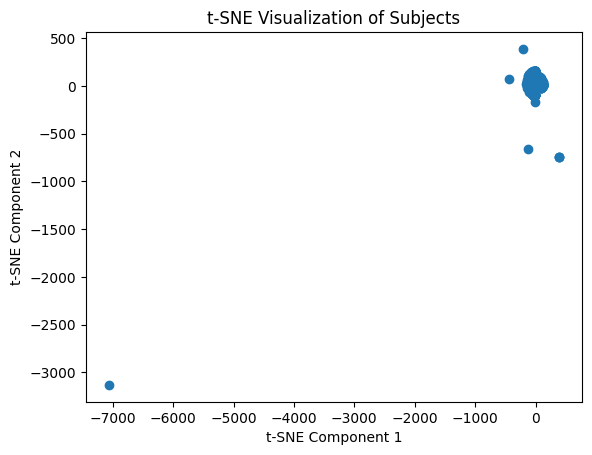

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to the subject representations (after removing the subject column)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(cell_line_representations.iloc[:, 1:])

# Plot the t-SNE results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title('t-SNE Visualization of Subjects')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

10. Compute clusters for cell lines

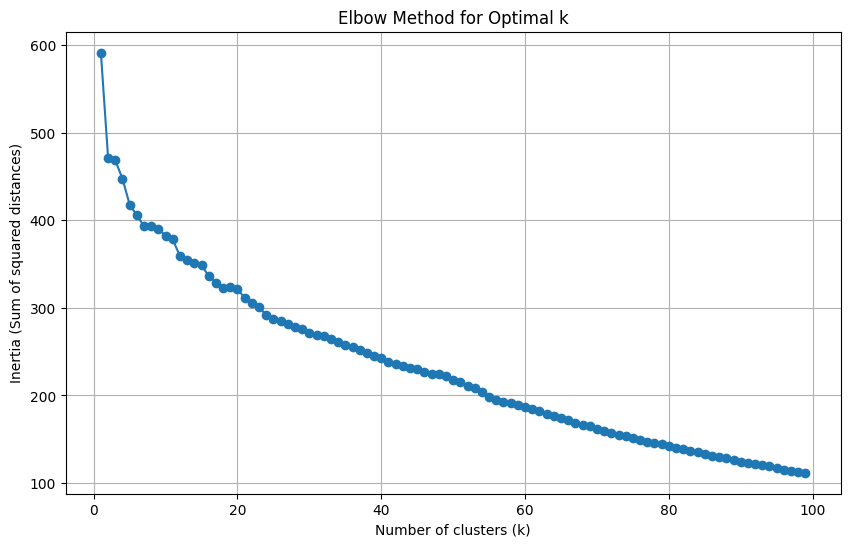

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of cluster numbers to try
cluster_range = range(1, 100)  # Try from 1 to 20 clusters
inertia = []  # To store the inertia values

# Compute K-Means for each number of clusters and store the inertia
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
    kmeans.fit(cell_line_representations)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to the closest cluster center

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [5]:
from sklearn.cluster import KMeans
import pandas as pd

# Apply K-Means for topic modeling (choose the number of clusters/topics)
num_topics = 23  # According to elbow method
kmeans = KMeans(n_clusters=num_topics, random_state=42, n_init='auto')
cell_line_representations['topic'] = kmeans.fit_predict(cell_line_representations)

# Now subject_representations contains a 'topic' column indicating the assigned topic for each subject
print(cell_line_representations['topic'].head())

cell_line
CVCL_0006    18
CVCL_0108    22
CVCL_0270     3
CVCL_0290    18
CVCL_0297     9
Name: topic, dtype: int32


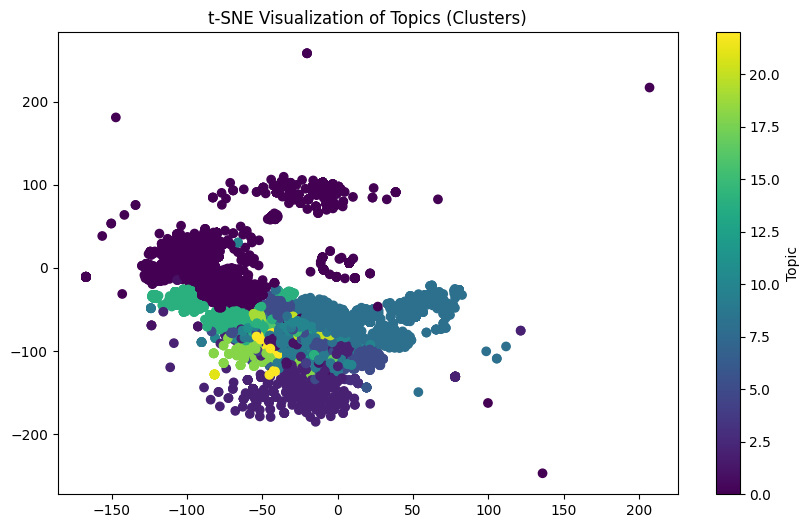

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming subject_representations contains the averaged embeddings for each subject
embedding_columns = list(str(i) for i in range(0, 384)) 

# Apply t-SNE to the subject representations (after removing the 'subject' column)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(cell_line_representations[embedding_columns])

# Visualize the 2D projection of topics
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cell_line_representations['topic'], cmap='viridis')
plt.title('t-SNE Visualization of Topics (Clusters)')
plt.colorbar(label='Topic')
plt.show()

In [8]:
from nltk.tokenize import word_tokenize
from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel

# Tokenize the text in each document (simple word tokenization for Gensim)
df['tokens'] = df['abstract'].apply(word_tokenize)

# Create a dictionary and corpus for Gensim (Gensim expects tokenized words)
dictionary = Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

In [9]:
from gensim.models import LdaModel

# Train the LDA model
lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42)

# Show the topics
lda.show_topics(num_topics=num_topics)

[(0,
  '0.049*"of" + 0.045*"," + 0.037*"the" + 0.037*"." + 0.034*"tomosyn" + 0.030*"in" + 0.022*"to" + 0.019*"by" + 0.019*"dendritic" + 0.019*"a"'),
 (1,
  '0.063*"the" + 0.038*"cell" + 0.038*"." + 0.025*"line" + 0.025*"to" + 0.025*"," + 0.025*"in" + 0.025*"a" + 0.025*"of" + 0.019*"we"'),
 (2,
  '0.093*"," + 0.048*"and" + 0.036*"of" + 0.030*"." + 0.024*"the" + 0.022*"to" + 0.018*"cell" + 0.016*"with" + 0.015*"cells" + 0.013*"a"'),
 (3,
  '0.048*"," + 0.036*">" + 0.036*"<" + 0.030*"." + 0.030*"of" + 0.027*"and" + 0.018*"2+" + 0.018*"Ca" + 0.018*"sup" + 0.018*"/sup"'),
 (4,
  '0.136*")" + 0.136*"(" + 0.039*"," + 0.021*"the" + 0.021*"." + 0.020*"of" + 0.019*"and" + 0.018*"2" + 0.015*"[" + 0.015*"]"'),
 (5,
  '0.041*"." + 0.041*"a" + 0.030*"," + 0.029*"blast" + 0.026*"and" + 0.026*"of" + 0.026*"the" + 0.022*"to" + 0.022*"in" + 0.019*"injury"'),
 (6,
  '0.124*"," + 0.053*"and" + 0.036*"has" + 0.036*"been" + 0.035*"." + 0.035*"the" + 0.035*"of" + 0.035*">" + 0.035*"<" + 0.018*"anticancer"'),

11. Compute Coherence Score

In [10]:
# Use LDA model from previous step
coherence_model_lda = CoherenceModel(model=lda, texts=df['tokens'], dictionary=dictionary, coherence='c_v')

# Get coherence score
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence Score: {coherence_lda}")

Coherence Score: 0.39504075960615537


In [11]:
from sklearn.cluster import KMeans
import pandas as pd

# Apply K-Means for topic modeling (choose the number of clusters/topics)
num_topics = 50  # According to elbow method
kmeans = KMeans(n_clusters=num_topics, random_state=42, n_init='auto')
cell_line_representations['topic'] = kmeans.fit_predict(cell_line_representations)

# Now subject_representations contains a 'topic' column indicating the assigned topic for each subject
print(cell_line_representations['topic'].head())


cell_line
CVCL_0006    22
CVCL_0108     7
CVCL_0270    15
CVCL_0290    22
CVCL_0297    46
Name: topic, dtype: int32


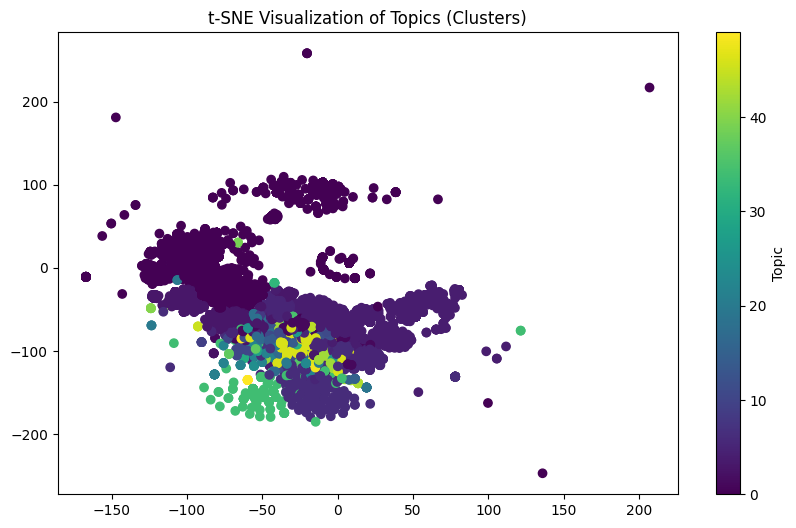

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming subject_representations contains the averaged embeddings for each subject
embedding_columns = list(str(i) for i in range(0, 384)) 

# Apply t-SNE to the subject representations (after removing the 'subject' column)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(cell_line_representations[embedding_columns])

# Visualize the 2D projection of topics
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cell_line_representations['topic'], cmap='viridis')
plt.title('t-SNE Visualization of Topics (Clusters)')
plt.colorbar(label='Topic')
plt.show()

In [13]:
from gensim.models import LdaModel

# Train the LDA model
lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42)

# Show the topics
lda.show_topics(num_topics=num_topics)

# Use LDA model from previous step
coherence_model_lda = CoherenceModel(model=lda, texts=df['tokens'], dictionary=dictionary, coherence='c_v')

# Get coherence score
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence Score: {coherence_lda}")

Coherence Score: 0.3829790628931902


In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

emb_columns = [str(i) for i in range(384)]

# Compute cosine similarity between cell_lines
similarity_matrix = cosine_similarity(cell_line_representations[emb_columns])